In [32]:
from glob import glob
from xml.etree import ElementTree as ET
import matplotlib.pyplot as plt
from pathlib import Path

In [26]:
def get_count(path):
    try:
        tree = ET.parse(path)
    except ET.ParseError:
        return 0
    count = tree.find('Count').text
    return int(count) if count else 0


In [27]:
import pandas as pd
esearchs = glob("output/esearch/*.xml")
dfs = []
for esearch in esearchs:
    esearch_count = get_count(esearch)
    dfs.append(pd.DataFrame({'count': [esearch_count], 'disease': [Path(esearch).stem]}))
df = pd.concat(dfs)

In [28]:
df = df.sort_values('count', ascending=False)
df

,count,disease
0,15799816,Hypothyroidism due to deficient transcription ...
0,1829752,Familial or sporadic hemiplegic migraine
0,1787356,Clinical group
0,1632588,Amino acid or protein metabolism disease with ...
0,1583873,Syndrome or malformation associated with head ...
...,...,...
0,0,Cleft palate_congenital heart defect_intellect...
0,0,Rare female infertility due to adrenal disorde...
0,0,Neurological channelopathy of the central nerv...
0,0,Lethal pontocerebellar hypoplasia_hypotonia_re...


In [30]:
diseases_with_no_articles = df[df['count'] == 0]
n_diseases_with_no_articles = len(diseases_with_no_articles)
n_diseases = len(df)
print(f"{n_diseases_with_no_articles} / {n_diseases} ({n_diseases_with_no_articles / n_diseases * 100:.2f}%) diseases with no articles")

717 / 6732 (10.65%) diseases with no articles


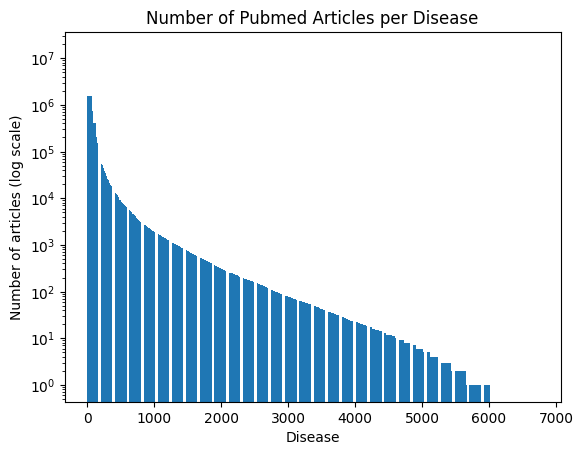

In [33]:
import matplotlib.pyplot as plt

plt.title("Number of Pubmed Articles per Disease")
plt.xlabel('Disease')
plt.bar(range(1, len(df) + 1), df['count'])
plt.ylabel('Number of articles (log scale)')
plt.yscale('log')
plt.show()
